#Abstract

The goal of this project is to predict the adult census income of the people around the world. We use the AutoML library by H2O.AI for the same. We analyze different models to analyze the best fit for the data. Various metrics were evaluated to determine the best model. We also infer the best hyperparamters for the model. Only applying AutoML it was found that the Stacked Ensemble approach gave the best results outperforming the naive Machine Learning models.

# Dataset


The "Adult Census Income" dataset is primarily about demographic and employment-related information of individuals in the United States. It is used to predict whether an individual's income exceeds $50,000 per year, making it a binary classification problem. The dataset provides various features such as age, education level, occupation, marital status, and more, which can be used to analyze and make predictions about an individual's income level based on these attributes.

Below is a description of the features in the dataset:

1. Age: This feature represents the age of the individual.

2. Workclass: This feature indicates the individual's employment status, such as "Private," "Self-emp-not-inc," "Self-emp-inc," "Federal-gov," "Local-gov," "State-gov," "Without-pay," or "Never-worked."

3. Fnlwgt: This represents the final weight, which is an estimate of the number of people represented by the sample.

4. Education: This feature describes the highest level of education achieved by the individual, such as "Bachelors," "Masters," "Doctorate," etc.

5. Education-num: This is the numerical representation of the individual's education level.

6. Marital Status: It describes the individual's marital status, such as "Married-civ-spouse," "Divorced," "Never-married," etc.

7. Occupation: This feature represents the individual's occupation, such as "Tech-support," "Craft-repair," "Sales," etc.

8. Relationship: It indicates the individual's relationship status in a family, such as "Wife," "Husband," "Not-in-family," etc.

9. Race: This feature describes the individual's race, such as "White," "Black," "Asian-Pac-Islander," etc.

10. Sex: This is the gender of the individual, either "Male" or "Female."

11. Capital Gain: It represents the capital gains of the individual.

12. Capital Loss: This feature indicates the capital losses of the individual.

13. Hours per Week: The number of hours the individual works per week.

14. Native Country: It represents the country of origin of the individual.

15. Income: The target variable, which indicates whether the individual's income exceeds 50k or not. This is a binary classification label, typically "<=50K" for incomes less than or equal to 50k and ">50K" for incomes greater than $50,000.

The dataset consists of :
1. Total 15 columns both categorical and numerical
2. There are 6 numerical columns and 9 categorical columns.

  The numerical columns are:


    1.   age
    2.   fnlwgt
    3.   education.num
    4.   capital.gain
    5.   capital.loss
    6.   hours.per.week

  The categorical columns are:

    1.  workclass
    2.  education
    3.  marital.status
    4.  occupation
    5.  relationship
    6.  race
    7.  sex
    8.  native.country
    9.  income
3. This dataset contains 32561 records.
4. The dependent variable is income. It has two types of values <=50k and >50k making it a binary classification problem.


Also below is the class descriptions of the respective categorical variables in the dataset for better understanding.

Workclass:



*   Private: Individuals employed in the private sector.
*   Self-emp-not-inc: Self-employed individuals who do not incorporate their businesses.
* Self-emp-not-inc: Self-employed individuals who do not incorporate their businesses.
* Self-emp-inc: Self-employed individuals who incorporate their businesses.
* Federal-gov: Employees of the federal government.
* Local-gov: Employees of local governments.
* State-gov: Employees of state governments.
* Without-pay: Individuals without any form of payment for their work.
* Never-worked: Individuals who have never worked.

Education:

* Bachelors: Individuals with a Bachelor's degree.
* Masters: Individuals with a Master's degree.
* Doctorate: Individuals with a Doctorate or Ph.D. degree.
* High-school: Individuals with a high school education.
* Some-college: Individuals who attended some college but did not complete a degree.


Marital Status:

* Married-civ-spouse: Married individuals living with their spouse.
* Divorced: Individuals who are divorced.
* Never-married: Individuals who have never been married.
* Separated: Individuals who are legally separated.
* Widowed: Individuals who are widowed.

Occupation:

* Tech-support: Individuals working in technical support roles.
* Craft-repair: Individuals in skilled trade or craft repair jobs.
* Sales: Individuals working in sales positions.
* Exec-managerial: Individuals in executive or managerial roles.

Relationship:

* Wife: Individuals who are wives in a family.
* Husband: Individuals who are husbands in a family.
* Not-in-family: Individuals not part of the immediate family.
* Own-child: Individuals who are the children of the family.

Race:

* White: Individuals who identify as White.
* Black: Individuals who identify as Black.
* Asian-Pac-Islander: Individuals of Asian or Pacific Islander descent.

Sex:

* Male: Male individuals.
* Female: Female individuals.

Native Country:

* United-States: Individuals from the United States.
* Mexico: Individuals from Mexico.
* Philippines: Individuals from the Philippines.
* Germany: Individuals from Germany.

# Importing Libraries and H2O cluster initialization

AutoML, short for Automated Machine Learning, is an approach that automates the process of training and optimizing machine learning models. Its primary goal is to make machine learning more accessible to individuals and organizations by reducing the expertise and time required to develop effective models. AutoML tools and platforms like H2O.ai's AutoML provide end-to-end automation for various machine learning tasks, such as model selection, hyperparameter tuning, feature engineering, and model evaluation.

H2O.ai's AutoML is a powerful tool for organizations and data scientists looking to streamline their machine learning projects, particularly when dealing with limited resources or when they want to quickly prototype and evaluate different machine learning techniques. It democratizes machine learning by making it more accessible to a broader audience.




In [ ]:
# installing h2o
!pip install  h2o

In [ ]:
# importing neccessary librarise
import h2o

In [ ]:
# inittializing local clusters
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpaisg6s7u
  JVM stdout: /tmp/tmpaisg6s7u/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpaisg6s7u/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_7fbpl0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# importing h20 auto ML class
from h2o.automl import H2OAutoML

In [ ]:
# importing neccessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline


# Data Preprcocessing

In [ ]:
# reading the dataset

df = pd.read_csv("https://raw.githubusercontent.com/Tanmayjoshi-3601/INFO6105/main/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
# w# checking the shape of the dataframe
df.shape

(32561, 15)

Now we will check the datatypes of the columns whether they are numerical or categorical.

In [ ]:
# printing all the datatypes of respective columns
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

As we can see there are 6 numerical columns and 9 categorical columns.

The numerical columns are:


1.   age
2.   fnlwgt
3.   education.num
4.   capital.gain
5.   capital.loss
6.   hours.per.week

The categorical columns are:

1.  workclass
2.  education
3.  marital.status
4.  occupation
5.  relationship
6.  race
7.  sex
8.  native.country
9.  income



**Overview of missing values**

In [ ]:
# checking for missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Now looking at the output of missing values, there are none but while we print the first 5 rows of the dataset, there seem to be some values having '?'. So lets see how many values have '?' as their current value.

In [ ]:
# counting the number of values having '?' in the dataset
count = (df=='?').sum().sum()
print(count)

4262


From the output it seems there are 4262 '?' values. Hence we need to replace them by nan to extract the missing values.

In [ ]:
# Replacing '? with nan to identify missing values
df.replace('?',np.nan, inplace = True)

# printing the missing values after replacement
df.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

From the output we can observe that 3 columns have missing values.
1. workclass - This column determines the working class of the person such as fed-gov, self-employed, private,etc. It has 1836 missing values.
2. occupation- This contains the different occupations of the person. It has 1843 missing values.
3. native.country - This column contains the country from where the person belongs. It has 583 missing values.

There are total of 32561 columns and seeing the missing values, we can see that they are almost 5% of the dataset which is insignificant.

Let's analyze the missing values in detail.

Text(0, 0.5, 'Columns')

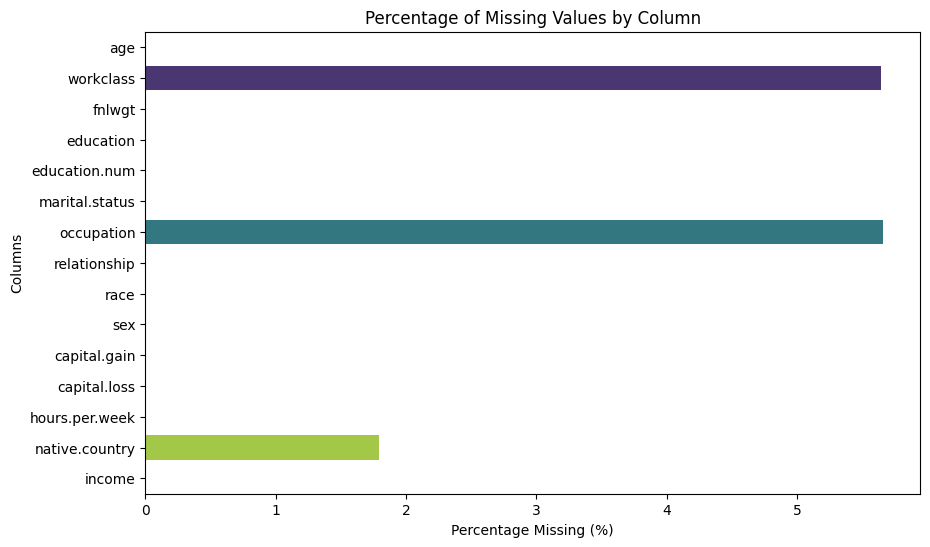

In [ ]:
# plotting the missing values according to percentages for better visualization
missing_percentage = (df.isnull().mean() * 100).round(2)

# Create a bar plot to visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage, y=missing_percentage.index, palette='viridis')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Percentage Missing (%)')
plt.ylabel('Columns')


In [ ]:
categorical_columns = ['workclass', 'occupation', 'native.country']

# Function to display unique classes and their counts for a column
def display_unique_classes(column_name):
    unique_classes = df[column_name].unique()
    num_classes = len(unique_classes)
    class_counts = df[column_name].value_counts()

    print(f"Column: {column_name}")
    print(f"Number of Unique Classes: {num_classes}")
    print("Unique Classes:")
    for class_label in unique_classes:
        print(f"- {class_label}: {class_counts.get(class_label, 0)} records")
    print("\n")

# Loop through the categorical columns and display unique classes and counts
for column_name in categorical_columns:
    display_unique_classes(column_name)

Column: workclass
Number of Unique Classes: 9
Unique Classes:
- nan: 0 records
- Private: 22696 records
- State-gov: 1298 records
- Federal-gov: 960 records
- Self-emp-not-inc: 2541 records
- Self-emp-inc: 1116 records
- Local-gov: 2093 records
- Without-pay: 14 records
- Never-worked: 7 records


Column: occupation
Number of Unique Classes: 15
Unique Classes:
- nan: 0 records
- Exec-managerial: 4066 records
- Machine-op-inspct: 2002 records
- Prof-specialty: 4140 records
- Other-service: 3295 records
- Adm-clerical: 3770 records
- Craft-repair: 4099 records
- Transport-moving: 1597 records
- Handlers-cleaners: 1370 records
- Sales: 3650 records
- Farming-fishing: 994 records
- Tech-support: 928 records
- Protective-serv: 649 records
- Armed-Forces: 9 records
- Priv-house-serv: 149 records


Column: native.country
Number of Unique Classes: 42
Unique Classes:
- United-States: 29170 records
- nan: 0 records
- Mexico: 643 records
- Greece: 29 records
- Vietnam: 67 records
- China: 75 reco

From the output we can see that the column workclass and native.country has mode significantly closer to the total values. Hence we can replace the missing values for the column workclass by mode. The columns occupation has a variety of unique classes and mode is not significant hence, we drop the records of that column. In case of native.country also we have a significant mode hence, we replace the missing values by mode.




In [ ]:
# calculating the mode for workclass and native.country
m_w = df.workclass.mode()[0]
m_n = df['native.country'].mode()[0]

# replacing the missing values with mode for both the columns
df['workclass'].fillna(m_w,inplace = True)
df['native.country'].fillna(m_n,inplace = True)

#dropping rows for the occupation column
df.dropna(subset=['occupation'],inplace = True)

# printing missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# Analysis of numerical and categorical variables

**Numerical Variables**

In [ ]:
# creating a list of columns which are numerical
num_col = df.select_dtypes(include=['int64','float64']).columns.tolist()

#printing num_col
print(num_col)

['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


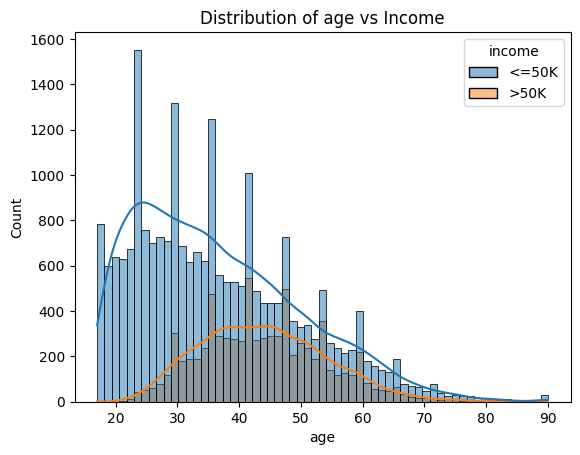

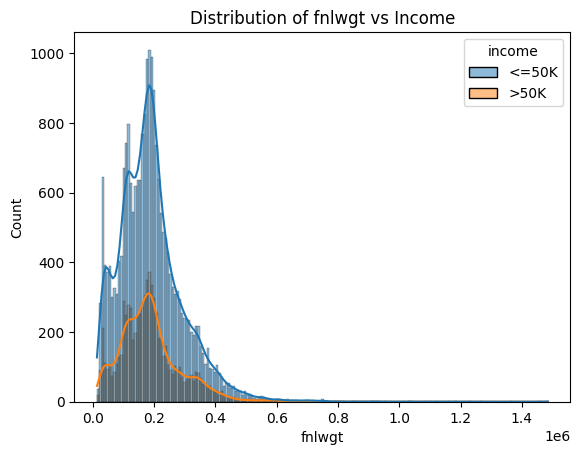

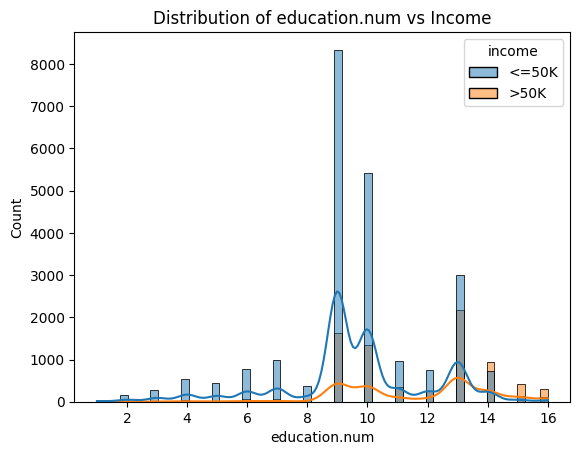

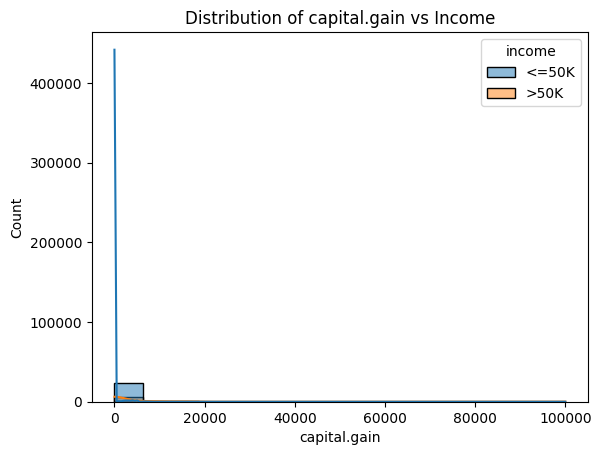

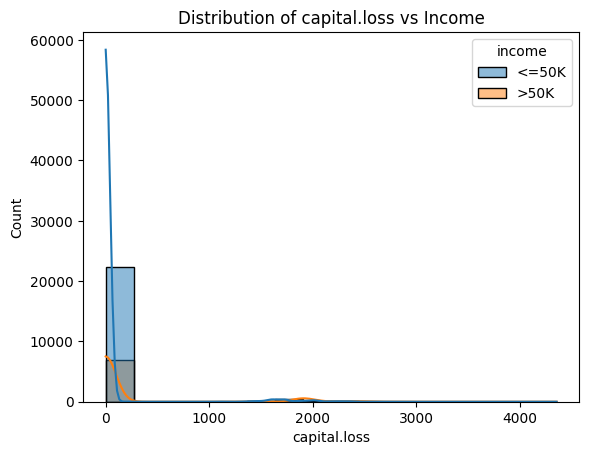

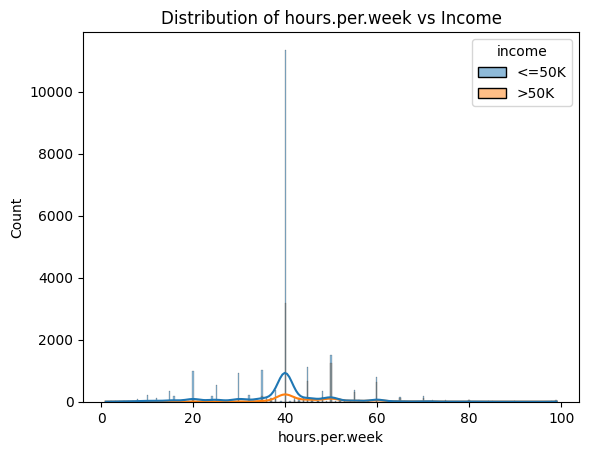

In [ ]:
# plotting histograms for seeing the distributions of numerical variables
for col in num_col:
  sns.histplot(data=df, x = col, hue = 'income',kde=True)
  plt.title(f'Distribution of {col} vs Income')
  plt.show()
  print("\n")


From the above histograms plots we make the following observations:

1. For the age variable, for the income <=50k the distribution is postively skewed. Hence, there maybe a chance of outliers. For >50k i.e the plot in the orange color the distribution is slightly postively skewed.
2. For the finalweight attribute we can see that the graph is clearly postively skewed for all values of income. Hence, there may be a chance of outliers.
3. The education.num variable is not skewed neither normal. Though, we can see that for the value 9 we have max count for <=50k and then for 10 and others. For >50k the distribution is comparitively even but still not normal.
4. The hours per week has a pretty even distribution but on a relatively smaller scale. Tho we have a peak at 40. So there maybe chance of outliers.
5. For capital-gain and capital-loss we have all values almost same concentrated near zero and for capital-loss very few values concentrated near 2000. Hence, we can infer that both these parameters maybe redundant for our model as they don't have much information.

In [ ]:
# dropping capital-gain and capital-loss columns
df.drop(['capital.gain','capital.loss'],axis=1,inplace=True)

# verify that columns have been dropped
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'hours.per.week', 'native.country', 'income'],
      dtype='object')

We dropped capital-gain and capital-loss columns as they seem redundant for our model having a biased distribution.

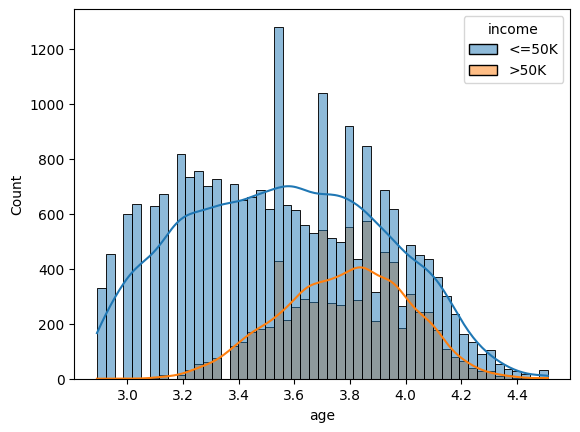

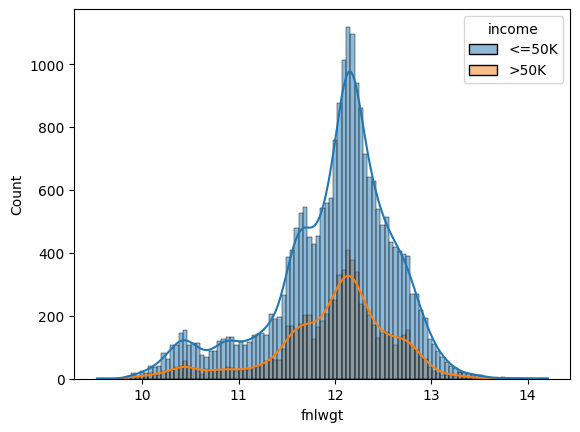

In [ ]:
# create a list of columns for applying log transformations
log_list = ['age','fnlwgt']

# applying log transformation to the desired columns
for col in log_list:
  df[col] = np.log1p(df[col])

# plotting a histogram to verify the distribution
for col in log_list:
  sns.histplot(data=df,x=col,hue='income',kde=True)
  plt.show()


After applying the log transformation we can see that the distributions of age and final-weight are much more even and closer to normal than before.

**Analyzing categorical features**

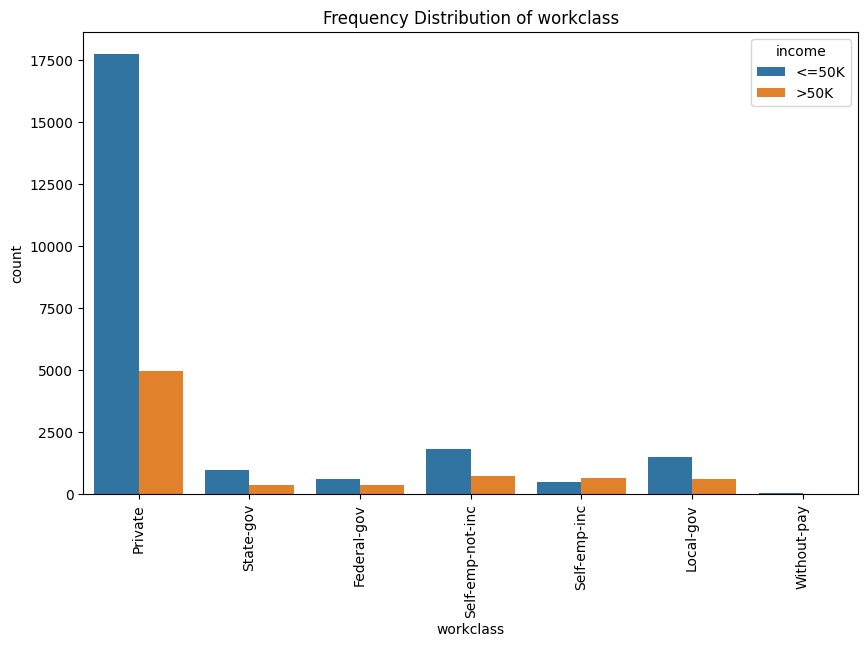

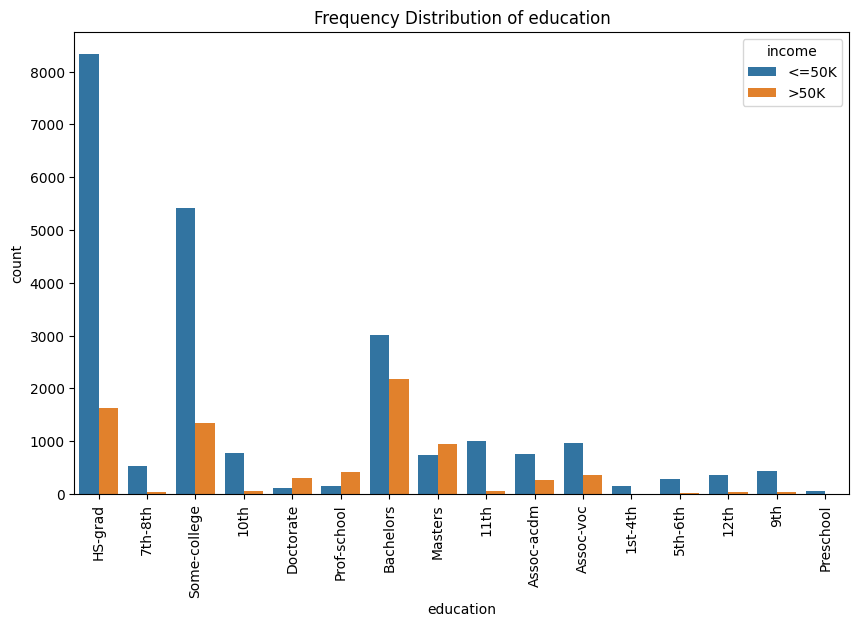

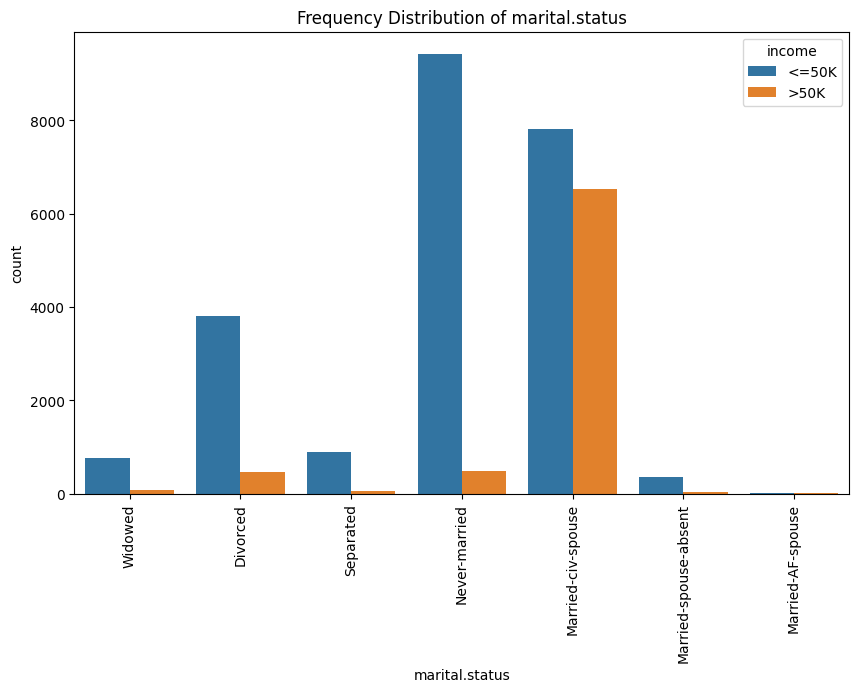

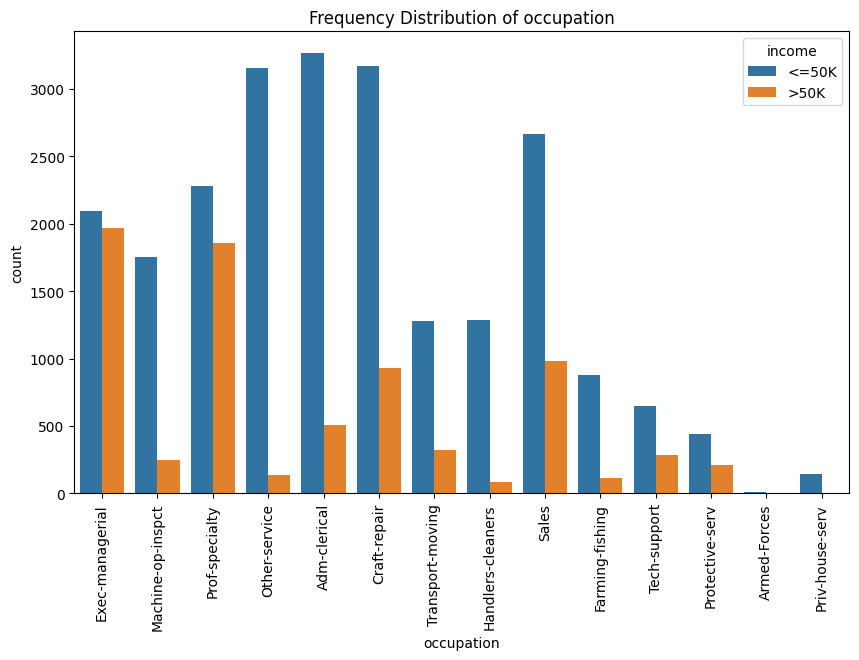

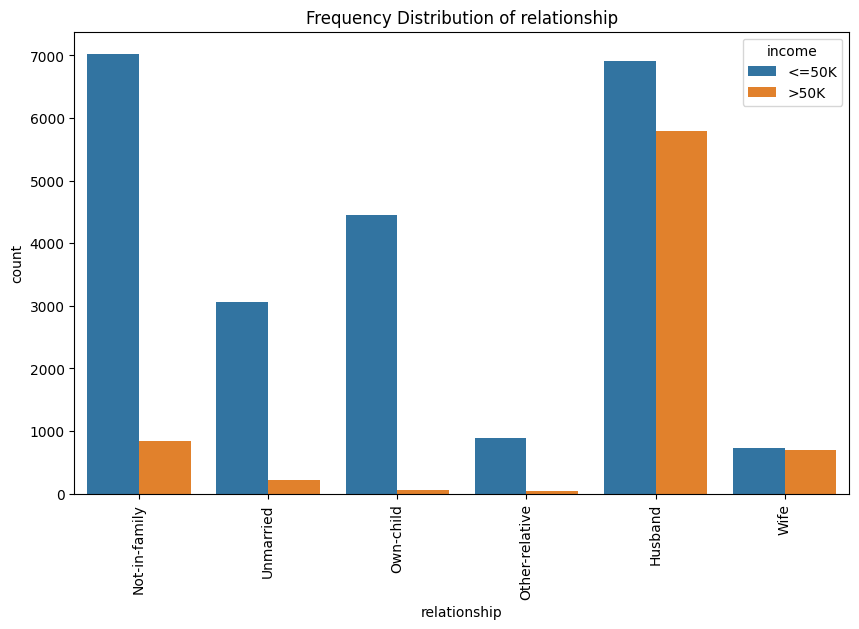

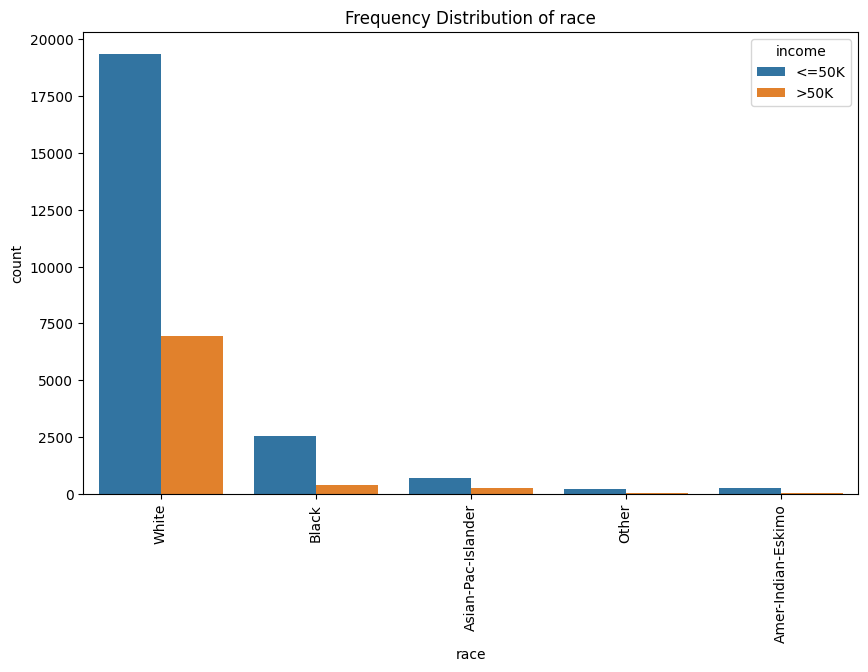

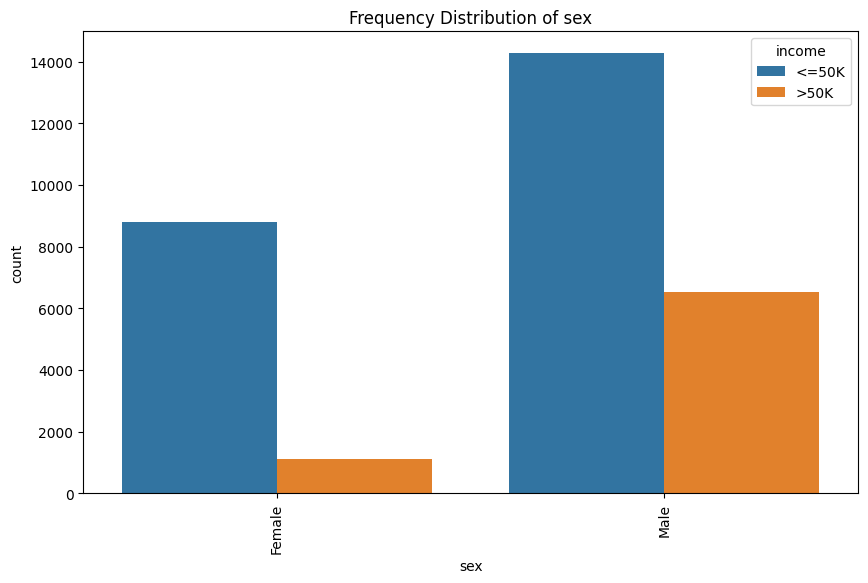

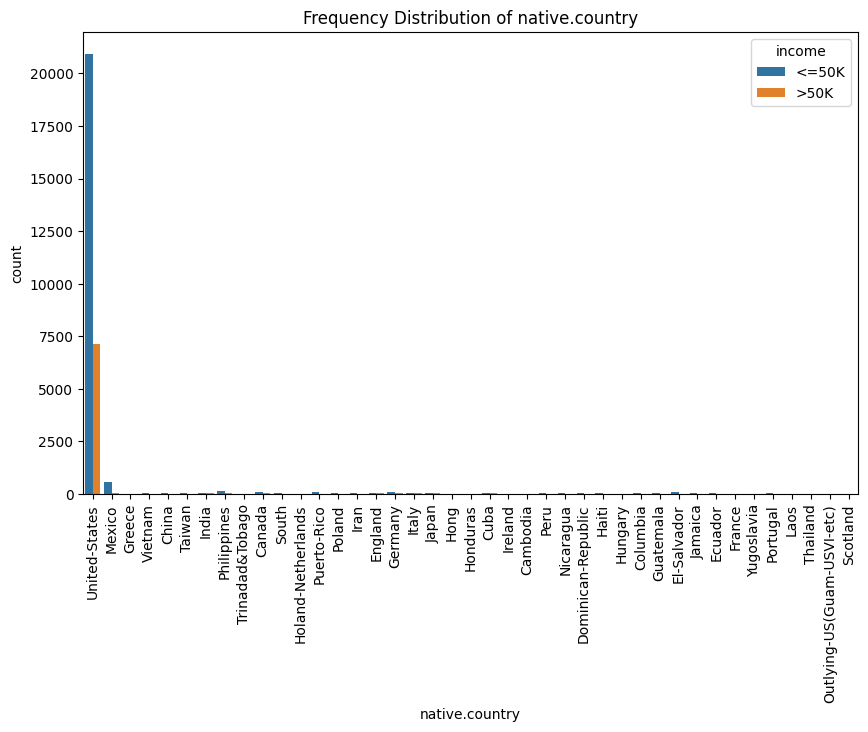

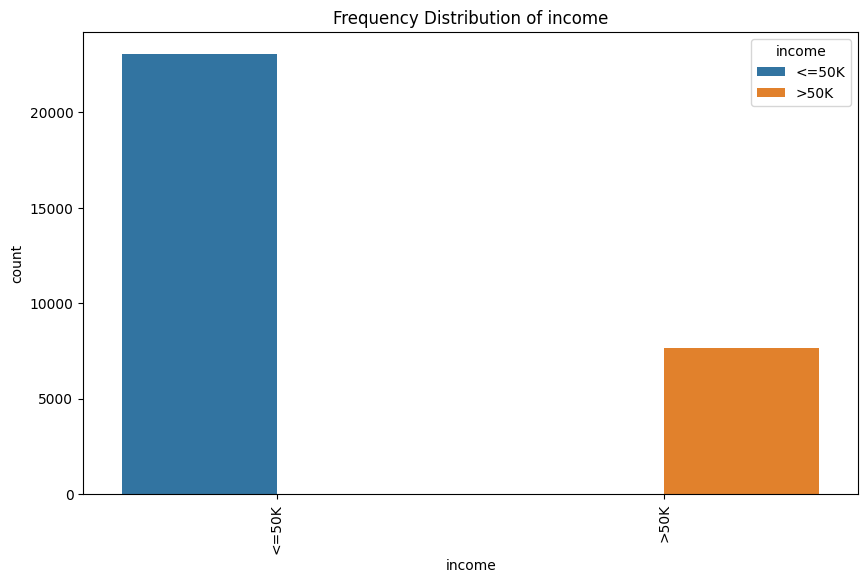

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


# plotting frequency distribution for categorical variables

for col in categorical_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df,x=col,hue='income')
  plt.title(f'Frequency Distribution of {col}')
  plt.xticks(rotation=90)
  plt.show()
  print("\n")

From the above plots we can make the following observations

1. Workclass: In all catrgories except self-employed catrgories, no of people <=50k income are more than the no of the people having income >50k. Most people that are in private workclass have income less than 50k, relatively, in comparison to people who have salary greater than 50k. In all other categories the ratio of income is comparable.

2. Education: In this feature we can clearly see that the people who have a bachelors degree have a decent salary. The number of people who ahave income >50k are almost at par with the number of people earning <=50k. It seems that the people who have a doctorate degree and school professors, most of them have an earning of >50k which is pretty evident in real life. It is quite obvious that the people who are students or in school earn <=50k.

3. Marital-status: The no of people who have a civilian spouse and earn more than 50k are comparable in numer to the number of people less than 50k. In general, there are very few people who are married to a spouse who is in armed forces.

4. Occupation: From the graph we can infer that no of people in managerial roles earning >50k are almost equal to the number of people earning <=50k which are the likely numbers for salaries in such roles. The people in professor speciality show similar pattern. The number of people in armed forces in total are very less in number, but among them most of them earn <=50k. The people in private house service earn mostly <=50k.

5. Relationship: Basically the people who are married have a decent income both in case of husband and wife. It is quite evident that their own child may earn less as he/she is yet to have a full time job at such a young age. In all other scenarios no of people earning <=50k are much more than the number of people earning >50k.

6. Native-country: Most of the people in the dataset are from USA i.e more than 70 percent. In USA, most people seem to earn <=50k. All the other countries have very less number of people in the dataset.







In [ ]:
categorical_cols.pop()
categorical_cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

# Feature Engineering

**Heatmap**

In [ ]:
# converting the target value to numerical by mapping it to 0 and 1
# so that we can incorporate it in the heatmap

df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [ ]:
df_ = df.copy()
X_ = df_.drop(['income'],axis=1)
y_ = df_['income']

<ipython-input-23-12e9084194db>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df.corr()


Text(0.5, 1.0, ' Correlation heatmap')

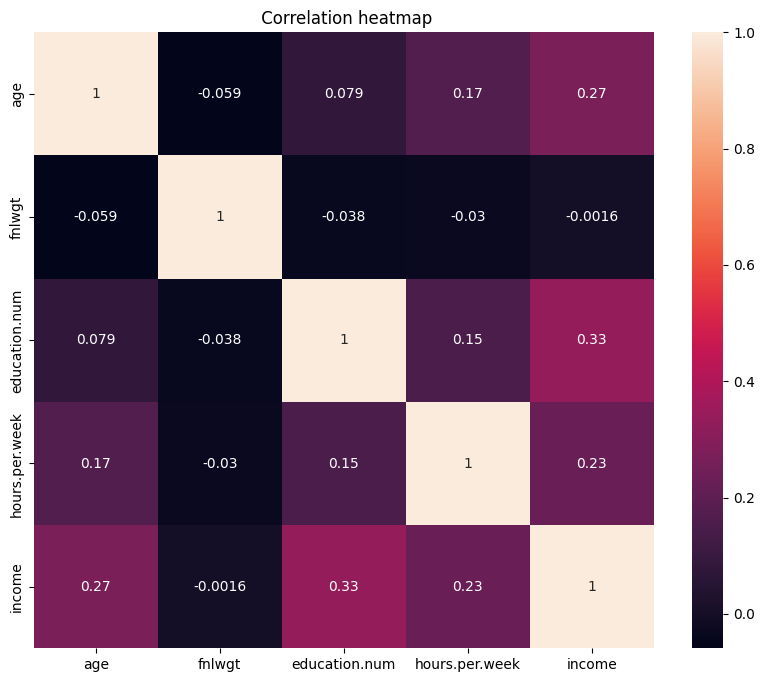

In [ ]:
# generating the correlation matrix
cm = df.corr()

# generating the heatmap from correlation matrix
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(cm, annot=True)
plt.title(" Correlation heatmap")


From the heatmap, we observe that all the variables have significant correlation with our target variable income. Hence they are some or the other way related to the target variable and the target variable is dependent on them. Also, there isn't very high correlation between the independent variables, therefore there is no scope for Principal Component Analysis or Dimensionality reduction. There is no multicollinearity.

# Model Implementation

Now we are done with data pre-processing and feature engineering. Now we will employ various Machine Learning algorithms using H2O's AutoML library to fit our dataset, analyze the accuracy metrics and eventually decide which model fits our data best and how accurate it is.

**One Hot Encoding**

To transform categorical data into a numerical format that machine learning algorithms can process, one-hot encoding is required. The dataset includes categorical parameters like "education," "marital status," and "occupation," which cannot be utilised directly in most machine learning methods. One-hot encoding converts these categorical variables to binary, with each category represented by a binary column. Because it translates categories into numerical values while keeping their individuality, this method allows the model to interpret and learn from categorical data. One-hot encoding is required to ensure that the machine learning model can successfully use all of the available information in the dataset.

In [ ]:
# creating a function to one-hot encode the columns
def encode_and_bind(dataframe,cols):
  dummies = pd.get_dummies(dataframe[cols])
  res = pd.concat([dataframe,dummies],axis=1)
  res = res.drop([cols],axis=1)
  return(res)

In [ ]:
# applying one-hot encoding
for feature in categorical_cols:
  df = encode_and_bind(df,feature)

df.head()

,age,fnlwgt,education.num,hours.per.week,income,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
1,4.418841,11.797134,9,18,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4.007333,11.851966,4,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3.737670,12.486216,10,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,3.555348,12.287030,9,45,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,3.663562,11.922396,6,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# splitting the  data into X and y variables where X is independent variables and y is target variable
X = df.drop(['income'],axis=1)
y = df['income']

# print(X.shape)

# X.head()


In [ ]:
y.head()

1    0
3    0
4    0
5    0
6    0
Name: income, dtype: int64

In the dataset, we don't have the data for training and testing seperately. Hence, we will split the data into training and testing sets using the in-built train test split functionality of sklearn.


In [ ]:
# splitting the data into train and test split
from sklearn.model_selection import train_test_split

# splitting the data into train and test in the ratio 70:30
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)



In [ ]:
train = pd.concat([X_train,y_train],axis=1,keys=['X_train','y_train'])

test = pd.concat([X_test,y_test],axis=1,keys=['X_test','y_test'])


In [ ]:
train.columns = train.columns.droplevel(0)

In [ ]:
test.columns = test.columns.droplevel(0)

Creating an H2O data frame so that we can feed it to the autoMl fit function.

In [ ]:
# creating a train and test H2O frame
hf = h2o.H2OFrame(train)
test_hf = h2o.H2OFrame(test)
hf.head()



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


age,fnlwgt,education.num,hours.per.week,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,income
3.61092,11.0313,10,60,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3.04452,11.7817,6,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3.7612,12.1062,6,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4.21951,12.1642,13,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3.29584,12.1813,9,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3.8712,12.1463,14,38,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3.13549,12.8612,9,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3.63759,10.974,10,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3.89182,11.2266,13,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3.85015,12.4845,10,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


As we can see below all the categorical columns are one hot encoded with each feature as an individual class

In [ ]:
hf.columns

['age',
 'fnlwgt',
 'education.num',
 'hours.per.week',
 'Federal-gov',
 'Local-gov',
 'Private',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Without-pay',
 '10th',
 '11th',
 '12th',
 '1st-4th',
 '5th-6th',
 '7th-8th',
 '9th',
 'Assoc-acdm',
 'Assoc-voc',
 'Bachelors',
 'Doctorate',
 'HS-grad',
 'Masters',
 'Preschool',
 'Prof-school',
 'Some-college',
 'Divorced',
 'Married-AF-spouse',
 'Married-civ-spouse',
 'Married-spouse-absent',
 'Never-married',
 'Separated',
 'Widowed',
 'Adm-clerical',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving',
 'Husband',
 'Not-in-family',
 'Other-relative',
 'Own-child',
 'Unmarried',
 'Wife',
 'Amer-Indian-Eskimo',
 'Asian-Pac-Islander',
 'Black',
 'Other',
 'White',
 'Female',
 'Male',
 'Cambodia',
 'Canada',
 'China',
 'Columbia',
 'Cuba',
 'Dominic

In [ ]:
# setting up the dataset to split into train and test H2Oframe
hf['income'] = hf['income'].asfactor()
predictors = hf.drop('income').columns
response = 'income'

In [ ]:
train_hf,val_hf = hf.split_frame(ratios=[.8],seed=1234)


Now we will try to fit the data to our AutoML function and analyze the different types of models that H2O employs for predtictions.

In [ ]:
aml = H2OAutoML(max_models=10,max_runtime_secs=300,seed=1234,exclude_algos = ["DeepLearning"])

In [ ]:
aml.train(x=predictors,y=response,training_frame=hf)

AutoML progress: |
20:00:54.186: _train param, Dropping bad and constant columns: [Holand-Netherlands]

█
20:00:57.705: _train param, Dropping bad and constant columns: [Holand-Netherlands]

█
20:00:59.413: _train param, Dropping bad and constant columns: [Holand-Netherlands]

███
20:01:06.898: _train param, Dropping bad and constant columns: [Holand-Netherlands]

█
20:01:09.472: _train param, Dropping bad and constant columns: [Holand-Netherlands]

███
20:01:15.780: _train param, Dropping bad and constant columns: [Holand-Netherlands]

█
20:01:19.173: _train param, Dropping bad and constant columns: [Holand-Netherlands]


20:01:21.662: _train param, Dropping bad and constant columns: [Holand-Netherlands]

██
20:01:25.59: _train param, Dropping bad and constant columns: [Holand-Netherlands]

█
20:01:26.928: _train param, Dropping bad and constant columns: [Holand-Netherlands]

██
20:01:29.415: _train param, Dropping unused columns: [Holand-Netherlands]

█
20:01:31.254: _train param, Dr

key,value
Stacking strategy,blending
Number of base models (used / total),5/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0
Metalearner fold_column,None


The above results suggest the following:


*   The best model that fits our data is Stacked Ensemble with total of 5 base models including GBM,XGBoost, GLM, and DRF. It also inlcluded metalearner as GLM.
*   The model gives an train AUC of 0.92 and val AUC of 0.89. The f1 score for train and test are 0.7334 and 0.69077 suggesting that precision and recall have a good balance in both train and val. Hence the model does not overfit the data.
*  The train and val MSE are 0.09 and 0.11 which are respectable values suggesting the model fits the data well and it makes sense.
*  Also the data is able to very nicely handle data imbalance. It is not biased towards the class with people having income <=50k.



In [ ]:
# printing the leaderboard of top 10 models
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20231102_200053,0.890881,0.35448,0.745224,0.187374,0.337078,0.113621
StackedEnsemble_AllModels_1_AutoML_1_20231102_200053,0.890823,0.355101,0.74452,0.19831,0.337527,0.113925
XGBoost_3_AutoML_1_20231102_200053,0.88921,0.356575,0.742423,0.194059,0.338385,0.114505
GBM_2_AutoML_1_20231102_200053,0.888942,0.359125,0.735477,0.197012,0.3391,0.114989
GBM_1_AutoML_1_20231102_200053,0.886895,0.361165,0.731458,0.202351,0.340903,0.116215
GBM_3_AutoML_1_20231102_200053,0.886796,0.362439,0.728825,0.193182,0.340368,0.11585
XGBoost_2_AutoML_1_20231102_200053,0.884399,0.368546,0.722667,0.192972,0.345045,0.119056
GBM_4_AutoML_1_20231102_200053,0.883727,0.367164,0.728102,0.203636,0.343222,0.117802
GLM_1_AutoML_1_20231102_200053,0.882146,0.368313,0.714868,0.192883,0.343712,0.118138
DRF_1_AutoML_1_20231102_200053,0.88118,0.371374,0.732676,0.202016,0.342934,0.117604


Above table describes the top 10 models according to the AUC and other metrics. We will be fetching two models from the table for further analysis.

# Model 1

The first model we will fetch from the table is GLM (Generalized Linear Estimator). Generalized Linear Models (GLM) is a statistical modeling approach that extends linear regression to handle a wide range of data types and distributions. It does this by introducing a link function to connect the linear predictor to the response variable, allowing for flexibility in modeling both continuous and categorical data. GLM is used for parameter estimation through maximum likelihood and offers interpretable coefficients, making it valuable for understanding the impact of predictor variables in various fields, despite not relying on assumptions of normality in the residuals.

In [ ]:
from h2o.estimators import H2OGeneralizedLinearEstimator

# Initialize the GLM model
# model1 = H2OGeneralizedLinearEstimator(family="binomial")

model1 = h2o.get_model(aml.leaderboard[8,'model_id'])


In [ ]:
# training the model
model1.train(x=predictors,y=response,training_frame=hf)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698955214308_207


GLM Model: summary
    family    link    regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 3.877E-4 )  102                           91                             5                       py_2_sid_bc97

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.11359820562645331
RMSE: 0.3370433290045262
LogLoss: 0.3533790905515709
AUC: 0.8889726356439884
AUCPR: 0.7097036848986038
Gini: 0.7779452712879769
Null degrees of freedom: 21501
Residual degrees of freedom: 21410
Null deviance: 24161.764531387133
Residual deviance: 15196.714410079756
AIC: 15380.714410079756

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30792127542162273
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      13197  2939  0.1821   (2939.0/16136.0)
1      1103   4263  0.2056   (1103.0/5366.0)
Total  14300  7202  0.188    (4042.0/21502.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.307921     0.67839   233
max f2                       0.166417     0.781385  294
max f0point5                 0.518211     0.679921  151
max accuracy                 0.475644     0.837085  166
max precision                0.980442     1         0
max recall                   0.000918288  1         398
max specificity              0.980442     1         0
max absolute_mcc             0.307921     0.561433  233
max min_per_class_accuracy   0.294836     0.807305  239
max mean_per_class_accuracy  0.222249     0.810397  270
max tns                      0.980442     16136     0
max fns                      0.980442     5364      0
max fps                      0.00037208   16136     399
max tps                      0.000918288  5366      398
max tnr                      0.980442     1         0
max fnr                      0.980442     0.999627  0
max fpr                      0.00037208   1         399
max tpr                      0.000918288  1         398

Gains/Lift Table: Avg response rate: 24.96 %, avg score: 24.96 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100456                   0.911576           3.46909    3.46909            0.865741         0.935912    0.865741                    0.935912            0.034849        0.034849                   246.909   246.909            0.0330518
2        0.0200446                   0.878547           3.54114    3.50503            0.883721         0.894363    0.87471                     0.915185            0.0354081       0.0702572                  254.114   250.503            0.0669106
3        0.0300437                   0.851439           3.39204    3.46743            0.846512         0.864809    0.865325                    0.898419            0.0339173       0.104174                   239.204   246.743            0.0987828
4        0.0400428                   0.831761           3.24294    3.41137            0.809302         0.841131    0.851336                    0.884114            0.0324264       0.136

The above results suggest the following:



*   The AUC value of 0.88 suggests a good magnitude of precision and recall.

*   MSE of 0.113 is really good indication of fit to the model.
*   The True positive and False positive rate values have a good balance for the dataset.


Interpretation of evaluation metrics.

*   **max precision**: The model demonstrates a high ability to correctly classify positive instances while minimizing false positives. This suggests that when the model predicts a positive outcome, it is often correct.

*   **max recall**: The model captures a high proportion of actual positive instances. It indicates a strong ability to identify positive cases when they occur, but it may come at the cost of increased false positives.

*   **max specificity**: The model effectively identifies true negatives, which is important when minimizing false alarms is a priority. It suggests that the model is good at classifying negative cases correctly.



# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_model_python_1698955214308_207

,0,1,Error,Rate
0,2600.0,543.0,0.1728,(543.0/3143.0)
1,199.0,855.0,0.1888,(199.0/1054.0)
Total,2799.0,1398.0,0.1768,(742.0/4197.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

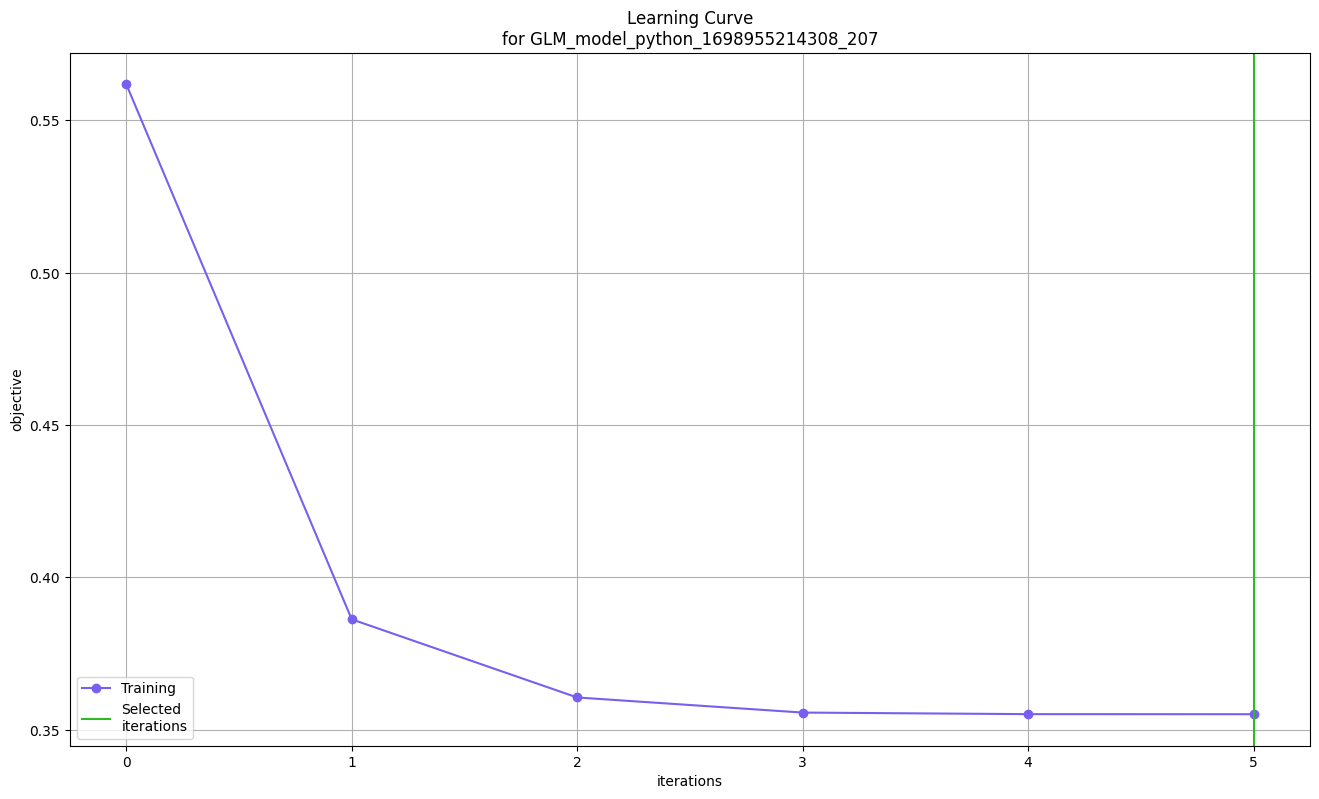

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

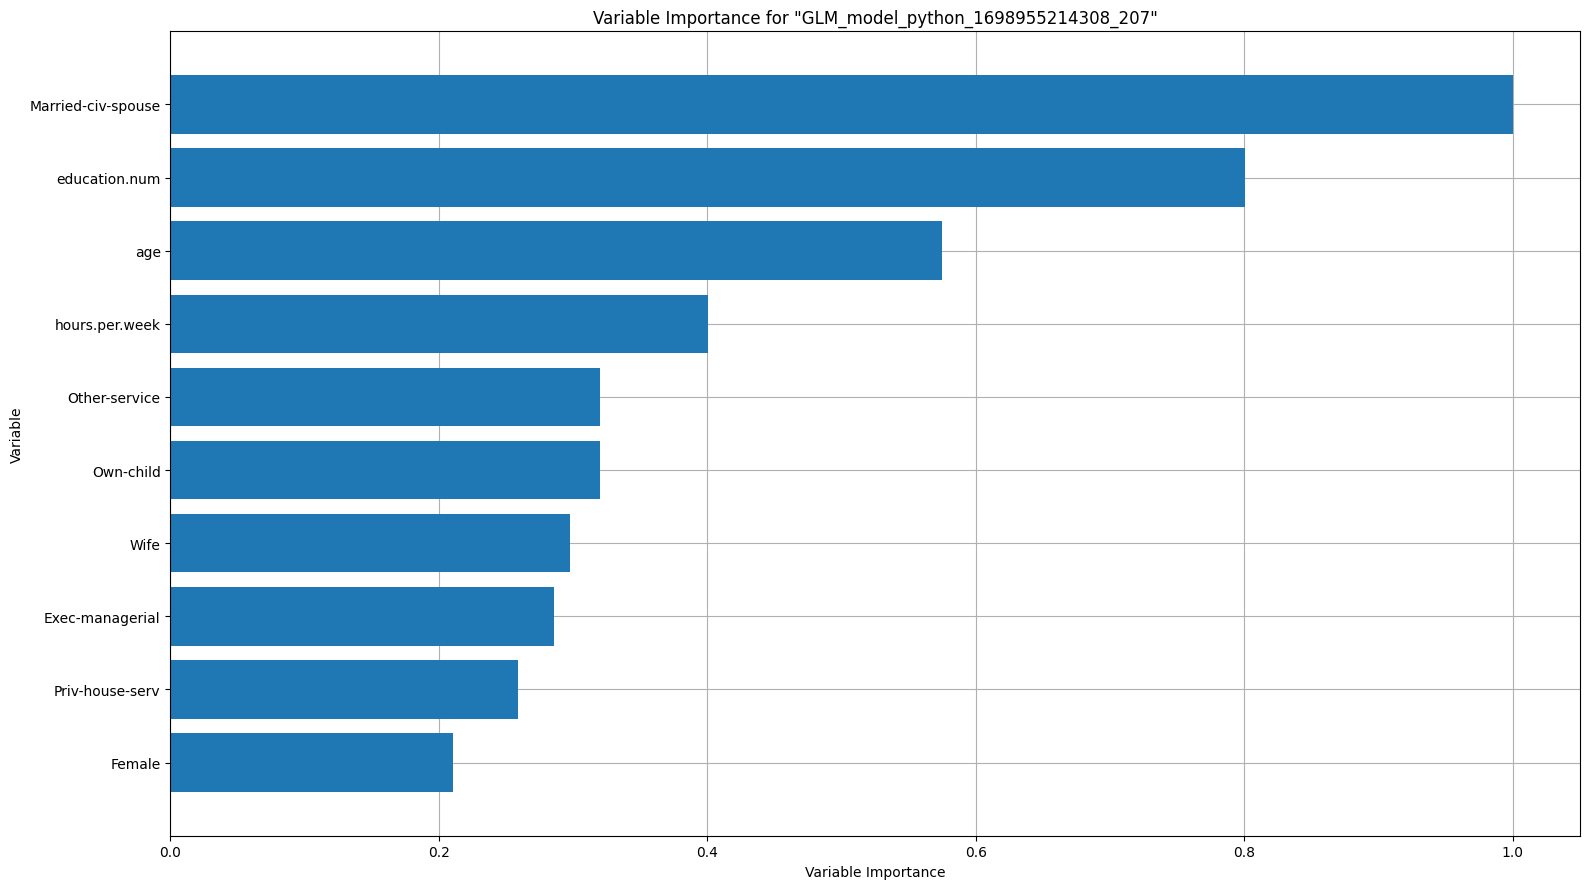

In [ ]:
# gives a visual explanation of the model
exm = model1.explain(val_hf,exclude_explanations=['pdp','ice'])

Above displayed plots suggest the following:

* For the learning curve plot as the iterations increase the loss eventually decreases till iteration 5 and then becomes constant. This proves that the model does not overfit the data because in that case, the loss would again start increasing with further iterations.

* The variable importance plot shows the relative importance of the most important variables in the model. The most imporant feature is married-civ-spouse. This means that the people who are married and have a spouse play a valuable role in predicting their income. This makes sense as generally people who are married earn in order to take care of their children and household be it males or females. Also education-num i.e. no of years of education is the second most important parameter responsible for our predictions. This would make sense as generally the people who are educated tend to earn more and people who aren't educated may be jobless.

**Hyperparamter Tuning**

The crucial process of determining the appropriate configuration for a machine learning model's hyperparameters in order to improve its performance and generalisation ability is known as hyperparameter tuning. These hyperparameters, which are not learnt from data, have a considerable influence on model behaviour. Grid search is a popular hyperparameter optimisation strategy that includes setting a set of hyperparameters and systematically looking through all possible combinations, assessing the model's performance for each set of parameters. The goal is to find the combination that produces the best results based on a given assessment criteria, hence boosting the model's efficacy across diverse tasks and applications.

We use H2OGridSearch library to perform grid search and hyperparameter tuning. We give a set of hyperparameter values beforehand and the GridSearch model tells us which hyperparamters give us the best results.

In [ ]:
# Import necessary libraries
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2OGeneralizedLinearEstimator

# Define the GLM hyperparameter grid
hyperparameters = {
    'alpha': [0.1, 0.5, 0.9],
    'lambda': [0.001,0.02,0.00002],
}

# Create the grid search object
grid = H2OGridSearch(model=H2OGeneralizedLinearEstimator,
                    hyper_params=hyperparameters)

# Train the models with different hyperparameter combinations
grid.train(x=predictors, y=response, training_frame=hf)

# Get the best model based on a specified metric (
grid_sorted = grid.get_grid(sort_by='logloss', decreasing=False)
best_model = grid_sorted.models[0]

# Make predictions and evaluate the best model
predictions = best_model.predict(test_hf)

# Evaluate the model's performance
performance = best_model.model_performance(test_hf)
print("Best Model Performance:")
print(performance)


glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/grid/grid_search.py:429: UserWarning: Adding alpha array to hyperparameter runs slower with gridsearch. This is due to the fact that the algo has to run initialization for every alpha value. Setting the alpha array as a model parameter will skip the initialization and run faster overall.
  warnings.warn(w_message)


glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Best Model Performance:
ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.11517650443250872
RMSE: 0.3393766409647381
LogLoss: 0.35763951570943336
AUC: 0.8848104630117135
AUCPR: 0.7035126160057438
Gini: 0.769620926023427
Null degrees of freedom: 9215
Residual degrees of freedom: 9113
Null deviance: 10320.932185900005
Residual deviance: 6592.0115535562745
AIC: 6798.0115535562745

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3246710995253819
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      5763  1169  0.1686   (1169.0/6932.0)
1      555   1729  0.243    (555.0/2284.0)
Total  6318  2898  0.1871   (1724.0/9216.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.324671     0.66731

In [ ]:
# Extract and print the best hyperparameters
best_hyperparameters = best_model.actual_params
print("Best Hyperparameters:")
print(best_hyperparameters)

Best Hyperparameters:
{'model_id': 'Grid_GLM_py_2_sid_bc97_model_python_1698955214308_210_model_7', 'training_frame': 'py_2_sid_bc97', 'validation_frame': None, 'nfolds': 0, 'checkpoint': None, 'export_checkpoints_dir': None, 'seed': 5970910099058996670, 'keep_cross_validation_models': True, 'keep_cross_validation_predictions': False, 'keep_cross_validation_fold_assignment': False, 'fold_assignment': None, 'fold_column': None, 'response_column': 'income', 'ignored_columns': None, 'random_columns': None, 'ignore_const_cols': True, 'score_each_iteration': False, 'score_iteration_interval': -1, 'offset_column': None, 'weights_column': None, 'family': 'binomial', 'rand_family': None, 'tweedie_variance_power': 0.0, 'tweedie_link_power': 1.0, 'theta': 1e-10, 'solver': 'IRLSM', 'alpha': [0.1], 'lambda': [2e-05], 'lambda_search': False, 'early_stopping': True, 'nlambdas': -1, 'standardize': True, 'missing_values_handling': 'MeanImputation', 'plug_values': None, 'compute_p_values': False, 'disp

So the above array shows the best hyperparamters found. From our given set of hypeparameters alpha and lambda, the best results are acheived for alpha of 0.1 and lambda of 0.00002.

**Regularization**

Regularisation is a method used in machine learning and statistics to reduce overfitting and enhance model generalisation. It does this by including a penalty term in the loss function of the model, which encourages it to maintain model parameters (weights) within predefined boundaries. L1 and L2 regularisation are two types of regularisation procedures that are often used:

*   L1 Regularization (Lasso): L1 regularization adds a penalty term to the loss function that is proportional to the absolute values of the model's parameters. It encourages some of the model's parameters to become exactly zero, effectively selecting a subset of the most important features while setting others to zero. L1 regularization is useful for feature selection and creating simpler, more interpretable models.

*   L2 Regularization (Ridge): L2 regularization adds a penalty term to the loss function that is proportional to the square of the model's parameters. It prevents any single parameter from becoming excessively large, thus encouraging all parameters to be small but non-zero. L2 regularization is effective at preventing multicollinearity and improving the stability of the model.

In the below code we use lambda for applying regularization.


Lambda (λ) is a key hyperparameter in generalized linear models (GLMs) used for regularization. A higher λ value increases the strength of regularization, reducing model complexity, preventing overfitting, and promoting robust generalization. The new_lambda of 0.1 in the code creates a new GLM model with relatively mild regularization. The choice of λ depends on the data and the balance between model complexity and overfitting, requiring experimentation for optimal performance in specific tasks.

In [ ]:
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator

# Loading existing trained GLM model
existing_model = h2o.get_model(model1.model_id)

# Creating a new GLM model with a different lambda value
new_lambda = 0.1  # Set your desired lambda value
new_glm_model = H2OGeneralizedLinearEstimator(
    family='binomial',  # Choose the appropriate family for your problem
    lambda_=new_lambda
)

# Train the new model using the same data as the existing model
new_glm_model.train(x=predictors, y=response, training_frame=hf)

# Evaluate the existing and new models
existing_model_performance = existing_model.model_performance(hf)
new_model_performance = new_glm_model.model_performance(hf)

# Compare the performance of the two models
print("Existing Model Performance:")
print(existing_model_performance)
print("New Model Performance:")
print(new_model_performance)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Existing Model Performance:
ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.11359820562645331
RMSE: 0.3370433290045262
LogLoss: 0.3533790905515709
AUC: 0.8889726356439884
AUCPR: 0.7097036848986038
Gini: 0.7779452712879769
Null degrees of freedom: 21501
Residual degrees of freedom: 21410
Null deviance: 24161.764531387133
Residual deviance: 15196.714410079756
AIC: 15380.714410079756

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30792127542162273
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      13197  2939  0.1821   (2939.0/16136.0)
1      1103   4263  0.2056   (1103.0/5366.0)
Total  14300  7202  0.188    (4042.0/21502.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.30

After changing the lamda values there is a difference between the evaluation metrics.For lamda 0.00002 the values of F1,AUC,MSE are 0.11, 0.888 and 0.67 respectively whereas on the other hand for the lamda the values are 0.13, 0.86 and 0.64 respectively. This suggests that for lower values of lamda the model performs better and regularization does help.

#Model 2

The second model we will analyze will be XGBoost. It is a machine learning algorithm that falls under the gradient boosting framework. It is widely used for supervised learning tasks, particularly for classification and regression problems. XGBoost builds an ensemble of decision tree models, sequentially improving their performance by minimizing prediction errors. It achieves this through gradient-based optimization and incorporates techniques like pruning, regularization, and parallel processing.

In [ ]:
model2 = h2o.get_model(aml.leaderboard[2,'model_id'])

In [ ]:

model2.train(x=predictors,y=response,training_frame=hf)

xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_model_python_1698955214308_225


Model Summary: 
    number_of_trees
--  -----------------
    50

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.09233914881661885
RMSE: 0.30387357373851853
LogLoss: 0.2918616458560049
Mean Per-Class Error: 0.15888560033232246
AUC: 0.9293282940606781
AUCPR: 0.8124077837661632
Gini: 0.8586565881213561

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37700735745222674
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      14217  1919  0.1189   (1919.0/16136.0)
1      1067   4299  0.1988   (1067.0/5366.0)
Total  15284  6218  0.1389   (2986.0/21502.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.377007     0.742231  207
max f2                       0.187337     0.823999  282
max f0point5                 0.586774     0.75506   131
max accuracy                 0.480678     0.868617  168
max precision                0.980611     1         0
max recall                   0.0066006    1         390
max specificity              0.980611     1         0
max absolute_mcc             0.377007     0.651193  207
max min_per_class_accuracy   0.319232     0.848677  228
max mean_per_class_accuracy  0.280633     0.852516  243
max tns                      0.980611     16136     0
max fns                      0.980611     5362      0
max fps                      0.000344794  16136     399
max tps                      0.0066006    5366      390
max tnr                      0.980611     1         0
max fnr                      0.980611     0.999255  0
max fpr                      0.000344794  1         399
max tpr                      0.0066006    1         390

Gains/Lift Table: Avg response rate: 24.96 %, avg score: 24.96 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100456                   0.918175           3.96998     3.96998            0.990741         0.939491     0.990741                    0.939491            0.0398807       0.0398807                  296.998   296.998            0.0397568
2        0.0200446                   0.89056            3.82071     3.89552            0.953488         0.904166     0.972158                    0.92187             0.0382035       0.0780842                  282.071   289.552            0.0773406
3        0.0300437                   0.867893           3.74616     3.84581            0.934884         0.878669     0.959752                    0.907492            0.0374581       0.115542                   274.616   284.581            0.113931
4        0.0400428                   0.846698           3.67161     3.80231            0.916279         0.856509     0.948897                    0.894761            0.0367126       0.152255                   267.161   280.231            0.149528
5        0.0500419                   0.829962           3.5225      3.7464             0.87907          0.838274     0.934944                    0.883474            0.0352218       0.187477                   252.25    274.64             0.183139
6        0.100037                    0.743472           3.4815      3.61401            0.868837         0.787838     0.901906                    0.835678            0.174059        0.361536                   248.15    261.401            0.348459
7        0.150079                    0.6434

The f1 score is 0.74 suggesting that this model performs much better than the first which had an f1 of 0.67. All the other metrics like AUC, MSE also suggest that the model performs better than the first model.

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_model_python_1698955214308_225

,0,1,Error,Rate
0,2842.0,301.0,0.0958,(301.0/3143.0)
1,200.0,854.0,0.1898,(200.0/1054.0)
Total,3042.0,1155.0,0.1194,(501.0/4197.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

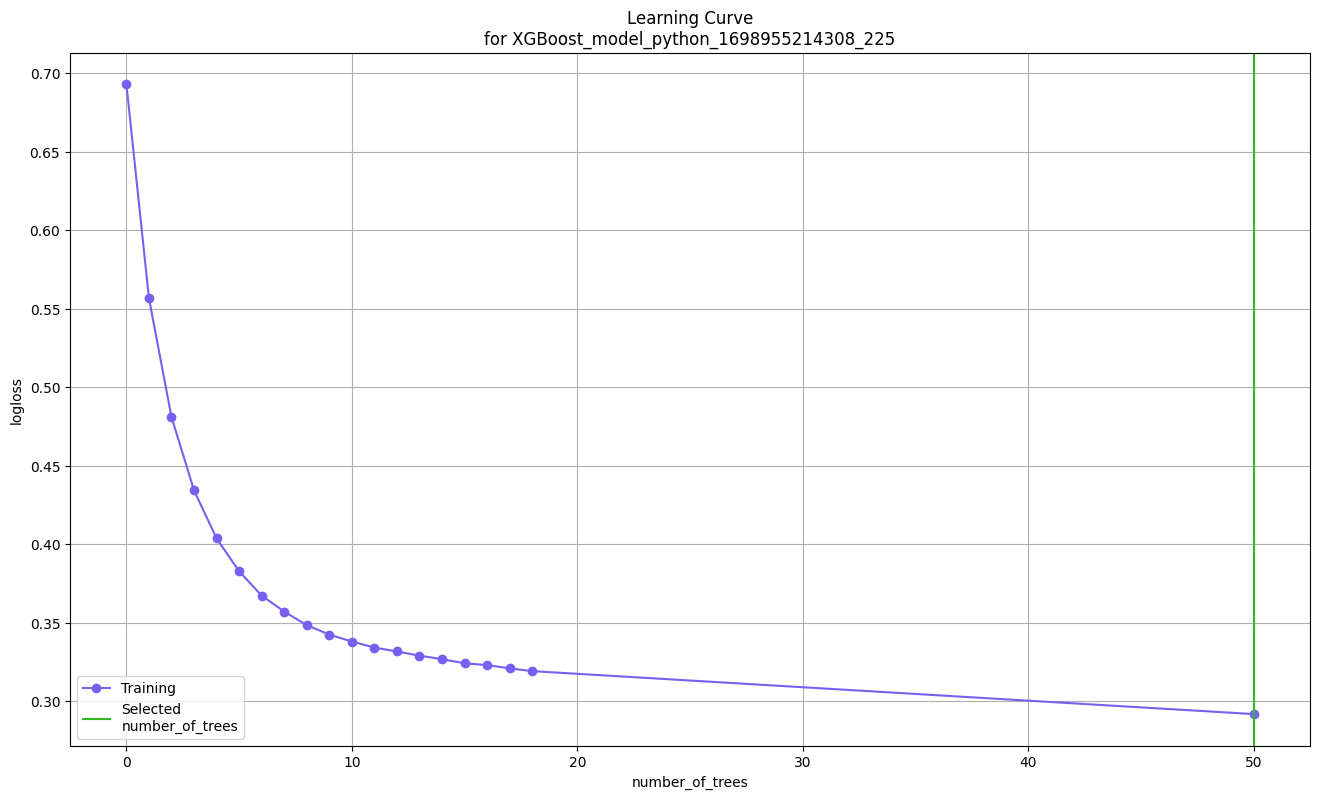

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

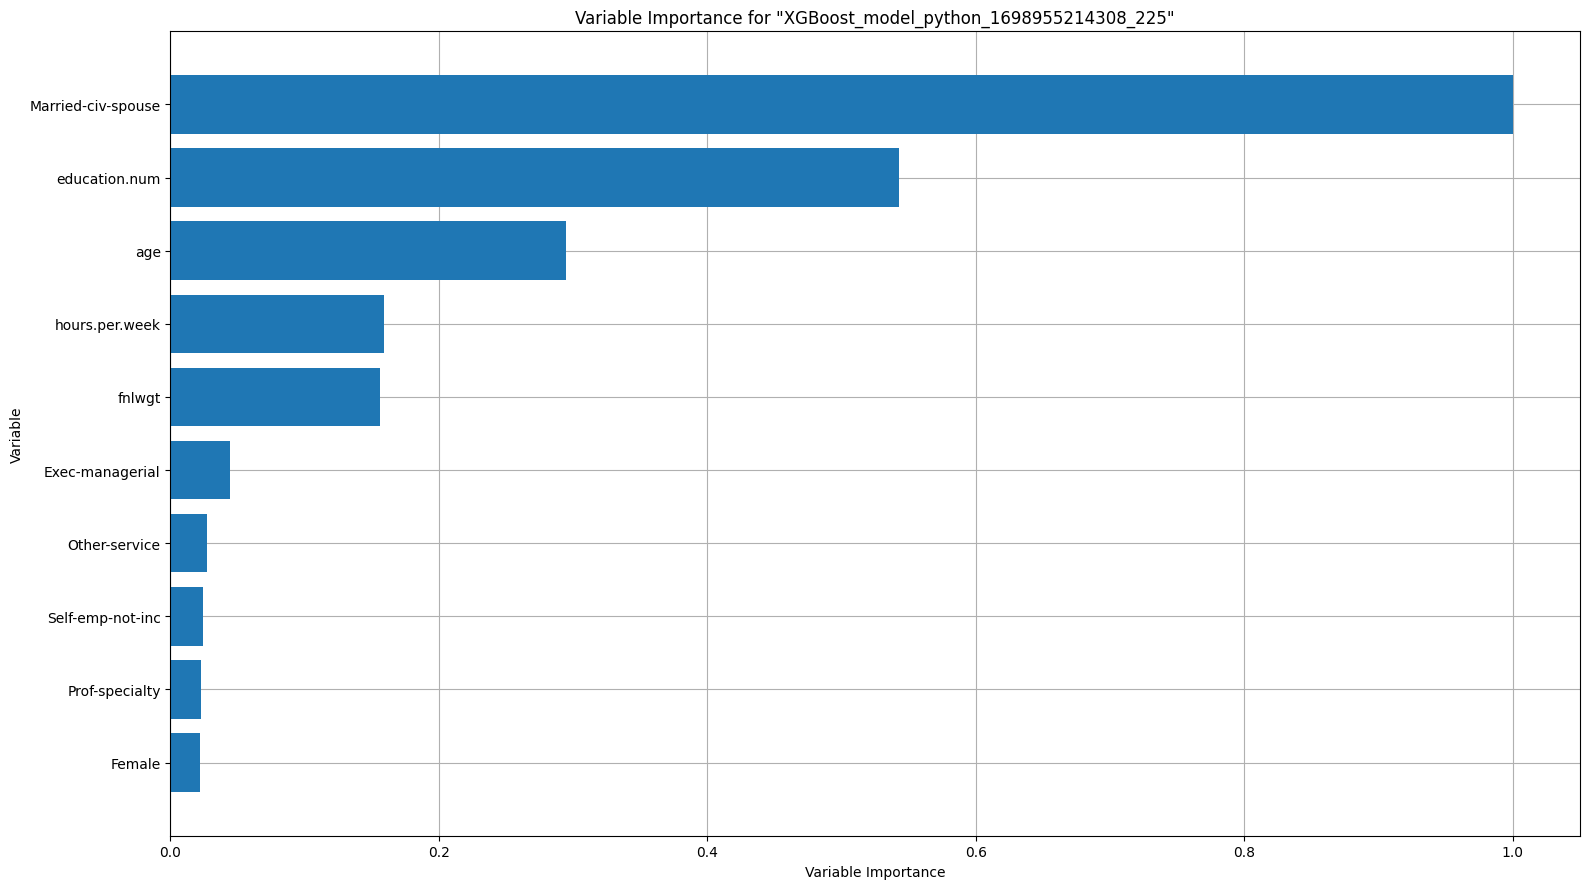

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

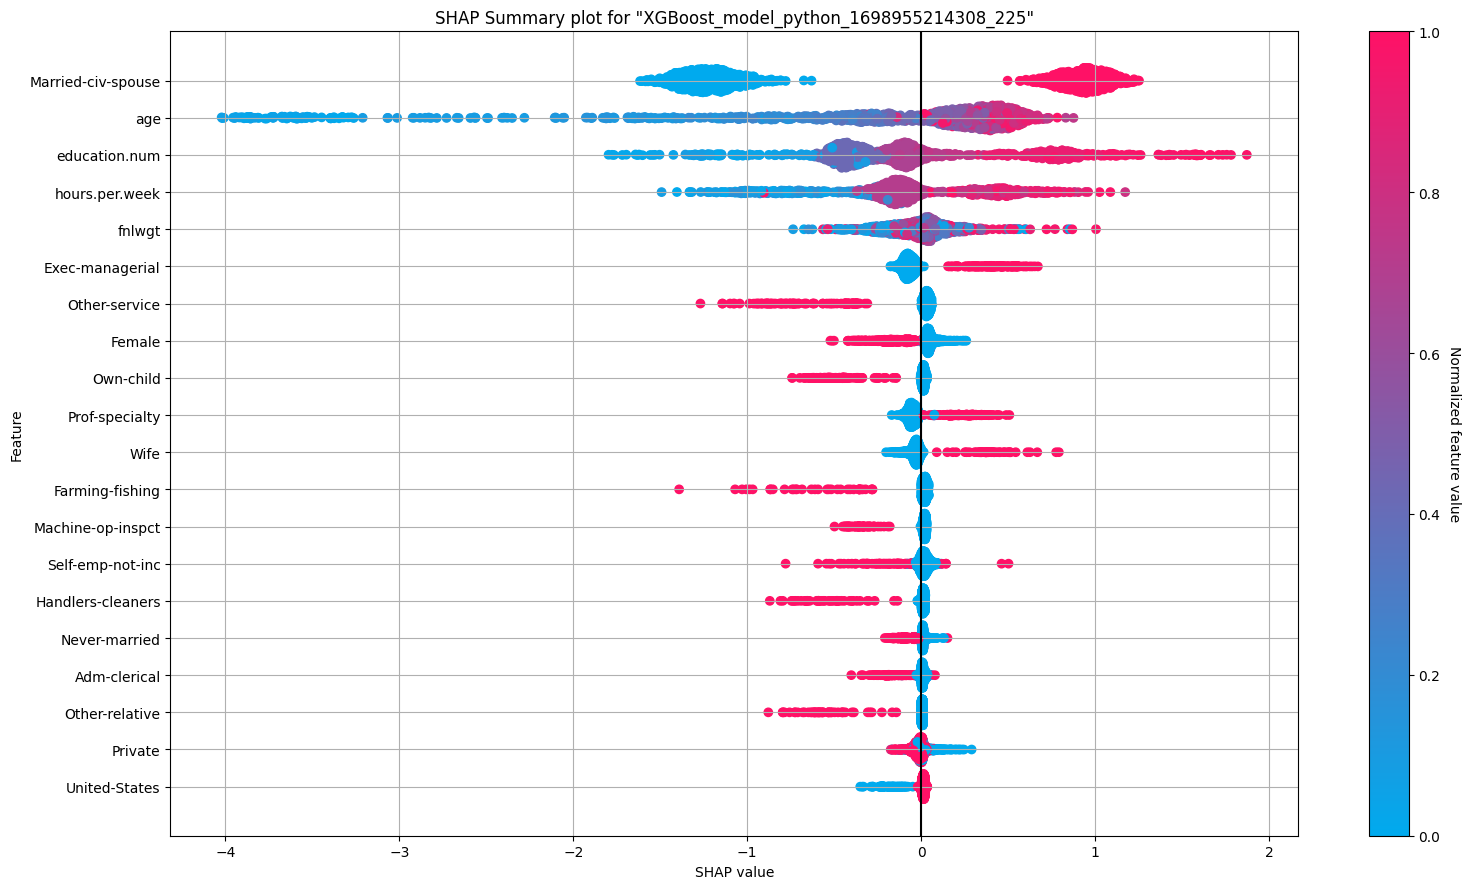

In [ ]:
exm = model2.explain(val_hf,exclude_explanations=['pdp','ice'])

Above displayed plots suggest the following:

*   For the learning curve plot as the iterations increase the loss eventually decreases till no of trees are 50 and then becomes constant. This proves that the model does not overfit the data because in that case, the loss would again start increasing with further iterations.

* The variable importance plot shows the relative importance of the most important variables in the model. The most imporant feature is married-civ-spouse. This means that the people who are married and have a spouse play a valuable role in predicting their income. This makes sense as generally people who are married earn in order to take care of their children and household be it males or females. Also education-num i.e. no of years of education is the second most important parameter responsible for our predictions. This would make sense as generally the people who are educated tend to earn more and people who aren't educated may be jobless.

* SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. The SHAP summary plot also justifies the variable importances and feature contributions.

**Hyperparameter Tuning**

In [ ]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2OXGBoostEstimator

# Define the XGBoost hyperparameter grid
hyperparameters = {
    'ntrees': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learn_rate': [0.01, 0.1, 0.2]

}

# Specify the XGBoost model generated by AutoML (replace 'best_xgboost_model_id' with the actual model ID)


# Create the grid search object
grid = H2OGridSearch(model=model2,
                    hyper_params=hyperparameters)

# Train the models with different hyperparameter combinations
grid.train(x=predictors, y=response, training_frame=hf)

# Get the best model based on a specified metric (e.g., logloss)
grid_sorted = grid.get_grid(sort_by='logloss', decreasing=False)
best_model = grid_sorted.models[0]

# Make predictions and evaluate the best model
predictions = best_model.predict(test_hf)

# Evaluate the model's performance
performance = best_model.model_performance(test_hf)
print("Best Model Performance:")
print(performance)


xgboost Grid Build progress: |███████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Best Model Performance:
ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.11971337986728867
RMSE: 0.34599621366033567
LogLoss: 0.3763695924692079
Mean Per-Class Error: 0.2120726436344858
AUC: 0.8793826417851472
AUCPR: 0.690297950077728
Gini: 0.7587652835702945

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31870216131210327
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      5740  1192  0.172    (1192.0/6932.0)
1      576   1708  0.2522   (576.0/2284.0)
Total  6316  2900  0.1918   (1768.0/9216.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.318702     0.658951  232
max f2         

In [ ]:
# Extract and print the best hyperparameters
best_hyperparameters = best_model.actual_params
print("Best Hyperparameters:")
print(best_hyperparameters)

Best Hyperparameters:
{'model_id': 'Grid_XGBoost_py_2_sid_bc97_model_python_1698955214308_247_model_27', 'training_frame': 'py_2_sid_bc97', 'validation_frame': None, 'nfolds': 0, 'keep_cross_validation_models': True, 'keep_cross_validation_predictions': False, 'keep_cross_validation_fold_assignment': False, 'score_each_iteration': False, 'fold_assignment': None, 'fold_column': None, 'response_column': 'income', 'ignored_columns': None, 'ignore_const_cols': True, 'offset_column': None, 'weights_column': None, 'stopping_rounds': 0, 'stopping_metric': None, 'stopping_tolerance': 0.001, 'max_runtime_secs': 0.0, 'seed': -1568755145489079163, 'distribution': 'bernoulli', 'tweedie_power': 1.5, 'categorical_encoding': 'OneHotInternal', 'quiet_mode': True, 'checkpoint': None, 'export_checkpoints_dir': None, 'ntrees': 150, 'max_depth': 9, 'min_rows': 1.0, 'min_child_weight': 1.0, 'learn_rate': 0.2, 'eta': 0.2, 'sample_rate': 1.0, 'subsample': 1.0, 'col_sample_rate': 1.0, 'colsample_bylevel': 1.0

So the above array shows the best hyperparamters found. From our given set of hypeparameters n_tress, max_depth and learn_rate , the best results are acheived for ntrees = 150, max_depth = 9 and learn_rate of 0.2.

**Regularization**

In [ ]:
from h2o.estimators import H2OXGBoostEstimator

# Load your existing trained model (replace 'existing_model_id' with your actual model ID)
existing_model = h2o.get_model(model2.model_id)

# Create a new XGBoost model with manual regularization settings
new_xgb_model = H2OXGBoostEstimator(
    reg_alpha=0.1,   # Set your desired L1 regularization strength
    reg_lambda=0.01  # Set your desired L2 regularization strength
)

# Set the training frame for the new model
# new_xgb_model._parms["training_frame"] = existing_model.training_frame

# Train the new model using the same data and settings as the existing model
new_xgb_model.train(x=predictors, y=response,training_frame=hf)

# Make predictions and evaluate the new model as usual
predictions = new_xgb_model.predict(test_hf)
performance = new_xgb_model.model_performance(test_hf)
print("New Model Performance:")
print(performance)
print("Old model Performance")
print(model2.model_performance(test_hf))

xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
New Model Performance:
ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.11419519951059597
RMSE: 0.3379278022160887
LogLoss: 0.35488613495568194
Mean Per-Class Error: 0.1913355458024563
AUC: 0.8871414948617695
AUCPR: 0.7084075458611698
Gini: 0.774282989723539

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27574582397937775
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      5551  1381  0.1992   (1381.0/6932.0)
1      419   1865  0.1835   (419.0/2284.0)
Total  5970  3246  0.1953   (1800.0/9216.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.275746     0.674503  243
max f2          

In both cases there is insignificant changes in values. Hence regularization does not help much




























#Analysing relation between all variables

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset as a Pandas DataFrame
# Replace 'data.csv' with your data file
# data = pd.read_csv('data.csv')

# Separate predictors (independent variables) from the response (dependent variable)
# X = data.drop(columns=['response_column'])  # Replace 'response_column' with the name of your dependent variable
# y = data['response_column']

# Add a constant (intercept) to the predictors for the statsmodels library
X = sm.add_constant(X)

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif)


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


            Variable       VIF
0              const  0.000000
1                age  1.846235
2             fnlwgt  1.060763
3      education.num       inf
4     hours.per.week  1.223784
..               ...       ...
98          Thailand       inf
99   Trinadad&Tobago       inf
100    United-States       inf
101          Vietnam       inf
102       Yugoslavia       inf

[103 rows x 2 columns]


Yeah so most of the VIF values are around a VIF of 1. Hence there is no significant multicollinearity

# **Conclusion**

We explored the different functionalities of H2O.ai and the flexibility it offers to use to perform AutoML tasks. We analyzed different models for predicting the adult census income dataset. We also performed various hyperparamter tuning for 2 of the models and understood what hyperparameters are the most important by employing Grid Search. We understood how regualrization helps in improving the model performance and the different types of Regularization and how they affect the model predictions. The best model was found to be Stacked Ensemble which consisted of multiple base models. The model can be open to tune further and accuracy and preditions can be further improved by tweaking the model.



# **LICENCSE**

MIT License

Copyright (c) 2023 Tanmay Joshi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **REFERENCES**

H20.ai- https://docs.h2o.ai/

GitHub Notebook: https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

GLM : https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html

XGBoost: https://xgboost.readthedocs.io/en/stable/

Grid Search: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html

